In [1]:
import numpy as np
from numpy.random import RandomState
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

## toy problem

In [2]:
# reproducibility
r = RandomState(seed=42)

# simulating data
n_points = 1000
n_outliers = 100
df = pd.DataFrame(
    np.vstack([
        2+r.randn(n_outliers,2)*4,
        r.randn(n_points,2)
    ]), columns=['x1', 'x2']
)
old_df = df.copy()
df.head()

,x1,x2
0,3.986857,1.446943
1,4.590754,8.092119
2,1.063387,1.063452
3,8.316851,5.069739
4,0.122102,4.170240


In [3]:
scaler_1 = StandardScaler()
df_std = df.copy()
df_std[:] = scaler_1.fit_transform(df)

scaler_2 = MinMaxScaler()
df_mm = df.copy()
df_mm[:] = scaler_2.fit_transform(df)

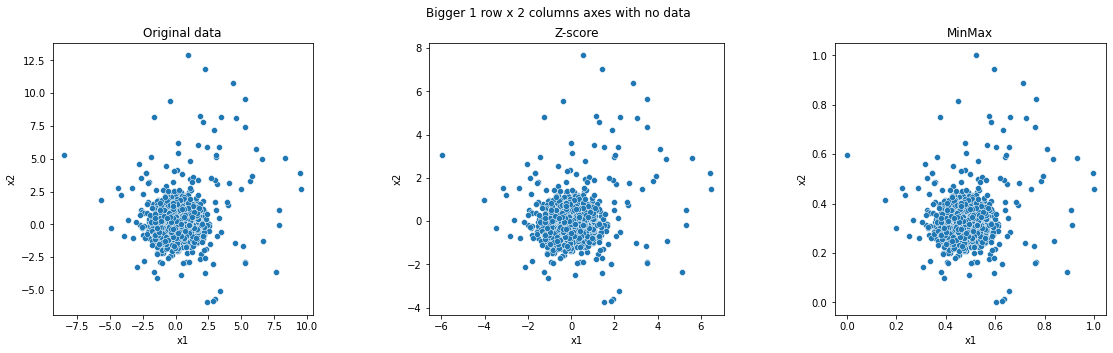

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')
sns.scatterplot(x='x1', y='x2', data=old_df, ax=axes[0])
axes[0].set_title('Original data')
axes[0].set_aspect(1)

sns.scatterplot(x='x1', y='x2', data=df_std, ax=axes[1])
axes[1].set_title('Z-score')
axes[1].set_aspect(1)

sns.scatterplot(x='x1', y='x2', data=df_mm, ax=axes[2])
axes[2].set_title('MinMax')
axes[2].set_aspect(1)
plt.show()